# Check data in preprocessed arrays

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Define paths

In [71]:
root = Path('/nfs/students/summer-term-2018/project_2/data/YT_CAR_DRIVING/')
imsize = 128

path_data = root / ('data' + str(imsize) + '.npy')
path_lm = root / 'landmarks.npy'
path_histo = root / 'histo.npy'
path_embeddings = root / 'embeddings.npy'
path_lowres = root / 'lowres.npy'

# Load data

In [72]:
data = np.load(path_data)
landmarks = np.load(path_lm)
histo = np.load(path_histo)
embeddings = np.load(path_embeddings)
lowres = np.load(path_lowres)

In [73]:
print('Data shape', data.shape, '\t\tData dtype', data.dtype, '\t\tRange', data.min(), data.max())
print('Landmarks shape', landmarks.shape, '\t\tLandmarks dtype', landmarks.dtype, '\t\tRange', landmarks.min(), landmarks.max())
print('Histo shape', histo.shape, '\t\tHisto dtype', histo.dtype, '\t\tRange', histo.min(), histo.max())
print('Embeddings shape', embeddings.shape, '\t\tEmbeddings dtype', embeddings.dtype, '\t\tRange', embeddings.min(), embeddings.max())
print('LowRes shape', lowres.shape, '\t\tLowRes dtype', lowres.dtype, '\t\tRange', lowres.min(), lowres.max())

Data shape (5812, 3, 128, 128) 		Data dtype uint8 		Range 0 255
Landmarks shape (5812, 144) 		Landmarks dtype float32 		Range 0.050016455 0.96846324
Histo shape (5812, 768) 		Histo dtype float32 		Range 0.0 0.25810128
Embeddings shape (5812, 128) 		Embeddings dtype float32 		Range -0.48208684 0.57670516
LowRes shape (5812, 192) 		LowRes dtype float32 		Range 0.0 1.0


# Plot sample

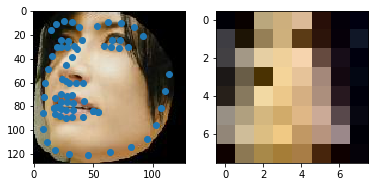

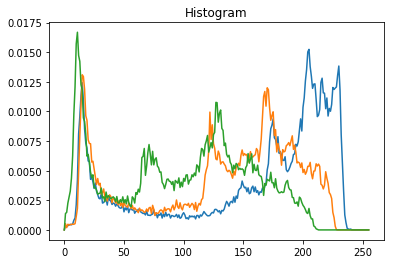

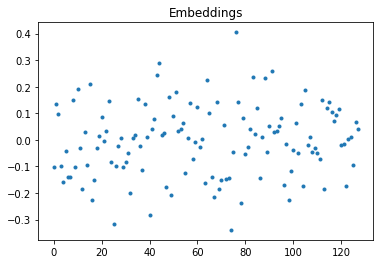

In [60]:
n = 302

plt.subplot(1,2,1)
plt.scatter(landmarks[n,::2]*imsize, landmarks[n,1::2]*imsize)
plt.imshow(data[n].transpose((1,2,0)))
plt.subplot(1,2,2)
plt.imshow(np.uint8(255*lowres[n]).reshape((3,8,8)).transpose((1,2,0)))
plt.show()
plt.plot(np.arange(256), histo[n,:256].reshape((256)))
plt.plot(np.arange(256), histo[n,256:512].reshape((256)))
plt.plot(np.arange(256), histo[n,512:768].reshape((256)))
plt.title('Histogram')
plt.show()
plt.plot(np.arange(128), embeddings[n], '.')
plt.title('Embeddings')
plt.show()

# Convert data

In [64]:
path = root / 'lowres.npy'
X = np.load(path)
print('Data shape', X.shape, 'Data dtype', X.dtype)

Data shape (194701, 192) Data dtype uint8


In [66]:
X = X / 255.0
X = X.astype(np.float32)
print('Data shape', X.shape, 'Data dtype', X.dtype)

Data shape (194701, 192) Data dtype float32


In [68]:
np.save(path, X)